## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.533502 -1.296838 -1.265070 -1.664731  0.319012 -1.948614
1 -0.688297 -0.966817  0.081432 -0.831921 -0.042704 -1.649289
2  0.951814 -0.843398 -0.287167  0.834195 -0.217406  0.107472
3  1.080148  0.728740 -1.240297 -1.363456  0.395077  0.345733
4  1.155091 -1.114065 -1.134739 -0.845138  1.470230 -0.438071


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9172926	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9086615	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9000721	total: 58.9ms	remaining: 19.6s
3:	learn: 0.8931324	total: 59.3ms	remaining: 14.8s
4:	learn: 0.8846941	total: 59.9ms	remaining: 11.9s
5:	learn: 0.8780177	total: 61.1ms	remaining: 10.1s
6:	learn: 0.8709368	total: 61.7ms	remaining: 8.75s
7:	learn: 0.8631892	total: 62.3ms	remaining: 7.73s
8:	learn: 0.8560559	total: 62.9ms	remaining: 6.92s
9:	learn: 0.8475125	total: 63.5ms	remaining: 6.29s
10:	learn: 0.8394498	total: 64ms	remaining: 5.76s
11:	learn: 0.8316746	total: 64.5ms	remaining: 5.31s
12:	learn: 0.8231771	total: 65.2ms	remaining: 4.95s
13:	learn: 0.8166502	total: 65.7ms	remaining: 4.63s
14:	learn: 0.8118633	total: 66.1ms	remaining: 4.34s
15:	learn: 0.8057120	total: 66.7ms	remaining: 4.1s
16:	learn: 0.7980541	total: 67.3ms	remaining: 3.89s
17:	learn: 0.7924064	total: 67.7ms	remaining: 3.69s
18:	learn: 0.7860494	total: 68.2ms	remaining: 3

104:	learn: 0.4150869	total: 109ms	remaining: 928ms
105:	learn: 0.4122653	total: 109ms	remaining: 923ms
106:	learn: 0.4090222	total: 110ms	remaining: 918ms
107:	learn: 0.4063453	total: 110ms	remaining: 912ms
108:	learn: 0.4037913	total: 111ms	remaining: 907ms
109:	learn: 0.4012867	total: 111ms	remaining: 901ms
110:	learn: 0.3993369	total: 112ms	remaining: 896ms
111:	learn: 0.3964195	total: 112ms	remaining: 892ms
112:	learn: 0.3944107	total: 113ms	remaining: 887ms
113:	learn: 0.3916763	total: 114ms	remaining: 882ms
114:	learn: 0.3891174	total: 114ms	remaining: 878ms
115:	learn: 0.3867545	total: 115ms	remaining: 874ms
116:	learn: 0.3842950	total: 115ms	remaining: 869ms
117:	learn: 0.3820273	total: 116ms	remaining: 864ms
118:	learn: 0.3800012	total: 116ms	remaining: 858ms
119:	learn: 0.3772682	total: 116ms	remaining: 853ms
120:	learn: 0.3748861	total: 117ms	remaining: 848ms
121:	learn: 0.3725856	total: 117ms	remaining: 845ms
122:	learn: 0.3704405	total: 118ms	remaining: 840ms
123:	learn: 

272:	learn: 0.1509344	total: 194ms	remaining: 517ms
273:	learn: 0.1500540	total: 195ms	remaining: 516ms
274:	learn: 0.1492737	total: 196ms	remaining: 518ms
275:	learn: 0.1485472	total: 197ms	remaining: 516ms
276:	learn: 0.1474402	total: 197ms	remaining: 514ms
277:	learn: 0.1463855	total: 197ms	remaining: 513ms
278:	learn: 0.1455715	total: 198ms	remaining: 511ms
279:	learn: 0.1446665	total: 198ms	remaining: 510ms
280:	learn: 0.1434763	total: 199ms	remaining: 510ms
281:	learn: 0.1425491	total: 200ms	remaining: 508ms
282:	learn: 0.1417522	total: 200ms	remaining: 507ms
283:	learn: 0.1410233	total: 200ms	remaining: 505ms
284:	learn: 0.1400856	total: 202ms	remaining: 506ms
285:	learn: 0.1393065	total: 202ms	remaining: 505ms
286:	learn: 0.1387067	total: 203ms	remaining: 504ms
287:	learn: 0.1376096	total: 203ms	remaining: 503ms
288:	learn: 0.1370200	total: 204ms	remaining: 502ms
289:	learn: 0.1362668	total: 205ms	remaining: 501ms
290:	learn: 0.1355311	total: 205ms	remaining: 500ms
291:	learn: 

451:	learn: 0.0552700	total: 290ms	remaining: 351ms
452:	learn: 0.0550542	total: 290ms	remaining: 351ms
453:	learn: 0.0547277	total: 291ms	remaining: 350ms
454:	learn: 0.0545184	total: 291ms	remaining: 349ms
455:	learn: 0.0543131	total: 292ms	remaining: 348ms
456:	learn: 0.0541117	total: 292ms	remaining: 347ms
457:	learn: 0.0538161	total: 293ms	remaining: 347ms
458:	learn: 0.0535065	total: 293ms	remaining: 346ms
459:	learn: 0.0531401	total: 294ms	remaining: 345ms
460:	learn: 0.0529362	total: 294ms	remaining: 344ms
461:	learn: 0.0527467	total: 295ms	remaining: 343ms
462:	learn: 0.0525632	total: 296ms	remaining: 343ms
463:	learn: 0.0521720	total: 296ms	remaining: 342ms
464:	learn: 0.0518882	total: 297ms	remaining: 341ms
465:	learn: 0.0516127	total: 297ms	remaining: 341ms
466:	learn: 0.0512320	total: 298ms	remaining: 340ms
467:	learn: 0.0509596	total: 298ms	remaining: 339ms
468:	learn: 0.0505873	total: 299ms	remaining: 338ms
469:	learn: 0.0502780	total: 299ms	remaining: 337ms
470:	learn: 

626:	learn: 0.0247553	total: 376ms	remaining: 224ms
627:	learn: 0.0246284	total: 377ms	remaining: 223ms
628:	learn: 0.0245158	total: 377ms	remaining: 223ms
629:	learn: 0.0244458	total: 378ms	remaining: 222ms
630:	learn: 0.0243230	total: 378ms	remaining: 221ms
631:	learn: 0.0241802	total: 379ms	remaining: 221ms
632:	learn: 0.0241074	total: 379ms	remaining: 220ms
633:	learn: 0.0239988	total: 380ms	remaining: 219ms
634:	learn: 0.0239429	total: 380ms	remaining: 218ms
635:	learn: 0.0238367	total: 380ms	remaining: 218ms
636:	learn: 0.0237817	total: 381ms	remaining: 217ms
637:	learn: 0.0236427	total: 381ms	remaining: 216ms
638:	learn: 0.0235729	total: 382ms	remaining: 216ms
639:	learn: 0.0234905	total: 382ms	remaining: 215ms
640:	learn: 0.0234323	total: 383ms	remaining: 214ms
641:	learn: 0.0233794	total: 383ms	remaining: 214ms
642:	learn: 0.0232767	total: 384ms	remaining: 213ms
643:	learn: 0.0231497	total: 384ms	remaining: 212ms
644:	learn: 0.0230852	total: 385ms	remaining: 212ms
645:	learn: 

831:	learn: 0.0110947	total: 473ms	remaining: 95.6ms
832:	learn: 0.0110769	total: 474ms	remaining: 95ms
833:	learn: 0.0110143	total: 475ms	remaining: 94.5ms
834:	learn: 0.0109969	total: 475ms	remaining: 93.9ms
835:	learn: 0.0109548	total: 476ms	remaining: 93.3ms
836:	learn: 0.0108986	total: 476ms	remaining: 92.8ms
837:	learn: 0.0108571	total: 477ms	remaining: 92.1ms
838:	learn: 0.0108401	total: 477ms	remaining: 91.6ms
839:	learn: 0.0107992	total: 478ms	remaining: 91ms
840:	learn: 0.0107478	total: 478ms	remaining: 90.4ms
841:	learn: 0.0107067	total: 479ms	remaining: 89.8ms
842:	learn: 0.0106570	total: 479ms	remaining: 89.2ms
843:	learn: 0.0105984	total: 480ms	remaining: 88.6ms
844:	learn: 0.0105412	total: 480ms	remaining: 88ms
845:	learn: 0.0105051	total: 480ms	remaining: 87.5ms
846:	learn: 0.0104316	total: 481ms	remaining: 86.9ms
847:	learn: 0.0103593	total: 481ms	remaining: 86.3ms
848:	learn: 0.0102928	total: 482ms	remaining: 85.7ms
849:	learn: 0.0102545	total: 482ms	remaining: 85.1ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

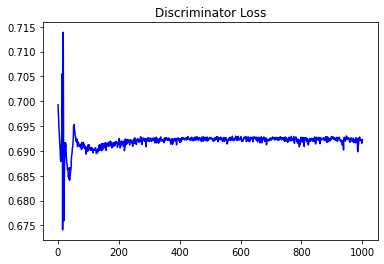

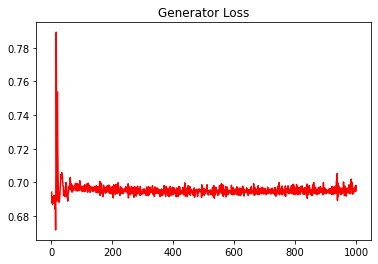

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06731728703162963


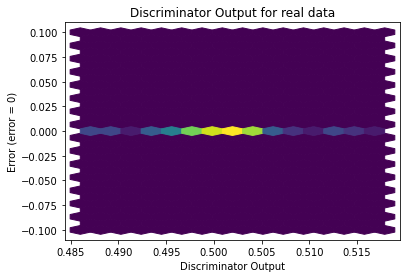

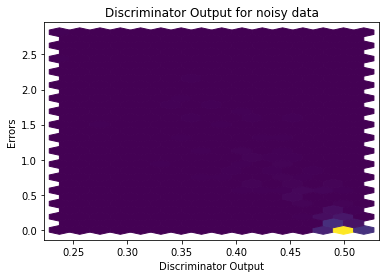

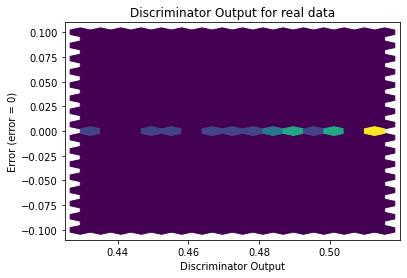

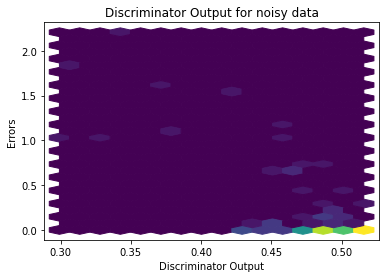

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


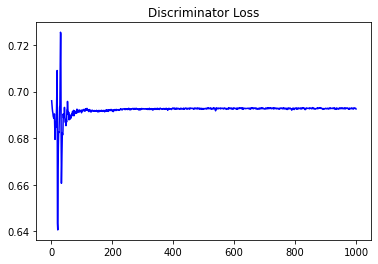

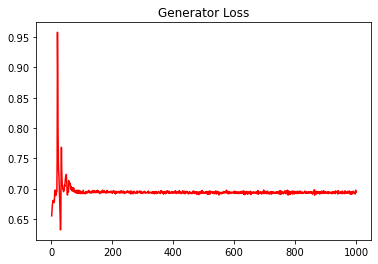

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06724027081023538


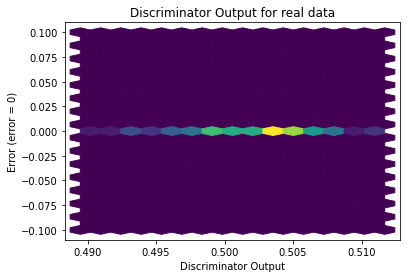

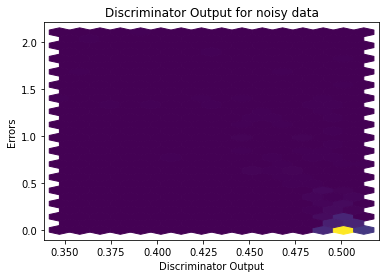

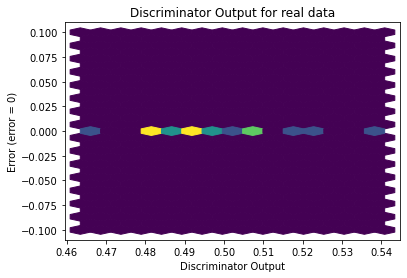

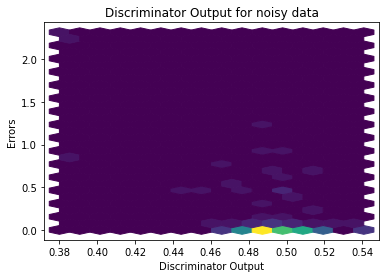

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7376]], requires_grad=True)
